In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

# Завантаження даних з CSV-файлів
users_activity = pd.read_csv("Users’ Activity.csv")
users = pd.read_csv("Users.csv")
streamers = pd.read_csv("Streamers.csv")

# Функція для перевірки та видалення дублікатів
def remove_duplicates(df, name):
    duplicates = df.duplicated().sum()
    print(f'Кількість дублікатів у таблиці {name}: {duplicates}')
    if duplicates > 0:
        df = df.drop_duplicates()
    return df

# Перевірка та видалення дублікатів для кожної таблиці
users_activity = remove_duplicates(users_activity, "Users' Activity")
users = remove_duplicates(users, "Users")
streamers = remove_duplicates(streamers, "Streamers")

# Перевірка розмірів таблиць після очищення
print(f'Users\' Activity після очищення: {users_activity.shape}')
print(f'Users після очищення: {users.shape}')
print(f'Streamers після очищення: {streamers.shape}')


Кількість дублікатів у таблиці Users' Activity: 0
Кількість дублікатів у таблиці Users: 0
Кількість дублікатів у таблиці Streamers: 0
Users' Activity після очищення: (922921, 7)
Users після очищення: (10395, 6)
Streamers після очищення: (1224, 10)


In [2]:
# Додавання префіксів до колонок
# Префікси для ознак користувачів
users.columns = ['user_' + col if col != 'userId' else 'userId' for col in users.columns]

# Префікси для ознак стрімерів
streamers.columns = ['streamer_' + col if col != 'streamerId' else 'streamerId' for col in streamers.columns]

# Префікси для ознак події (тільки ознаки, які є специфічними для подій)
users_activity = users_activity.rename(columns={
    'date': 'event_date',
    'timestamp': 'event_timestamp',
    'event': 'event_type',
    'streamId': 'event_streamId',
    'coins_spent_on_gift': 'event_coins_spent_on_gift'
})

# Створення цільової змінної
users_activity['event_sent_gift'] = users_activity['event_type'].apply(lambda x: 1 if x == 'user sent gift' else 0)

# Об'єднання даних за userId і streamerId
merged_data = pd.merge(users_activity, streamers, on='streamerId', how='left')
merged_data = pd.merge(merged_data, users, on='userId', how='left')

# Перегляд нової таблиці з префіксами
print(merged_data.columns)
merged_data.head()



Index(['event_date', 'event_timestamp', 'userId', 'streamerId', 'event_type',
       'event_streamId', 'event_coins_spent_on_gift', 'event_sent_gift',
       'streamer_install_date', 'streamer_registration_date',
       'streamer_gender', 'streamer_streamer_type', 'streamer_followers',
       'streamer_coins_earned_all_time', 'streamer_avg_stream_duration',
       'streamer_avg_watchers_per_stream',
       'streamer_avg_earned_coins_per_stream', 'user_install_date',
       'user_registration_date', 'user_gender', 'user_followings',
       'user_media_source'],
      dtype='object')


,event_date,event_timestamp,userId,streamerId,event_type,event_streamId,event_coins_spent_on_gift,event_sent_gift,streamer_install_date,streamer_registration_date,streamer_gender,streamer_streamer_type,streamer_followers,streamer_coins_earned_all_time,streamer_avg_stream_duration,streamer_avg_watchers_per_stream,streamer_avg_earned_coins_per_stream,user_install_date,user_registration_date,user_gender,user_followings,user_media_source
0,2022-10-02,2022-10-02 16:46:33,62699531cbde3a0d5bfa5bd4,61f95f64a2f894c483b71574,user started to follow streamer,non-stream,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-27,2022-04-27,iPreferNotToSay,14.0,googleadwords_int
1,2022-10-02,2022-10-01 23:59:30,63316b6dd177d176c106053f,62b0e29c7a0cc5d5c05367b1,user opened stream,6338ce2a08aa4f2581acba95,NaN,0,2022-06-20,2022-06-20,female,Official,3173.0,11010.0,11.71,113.30,64.45,2022-09-26,2022-09-26,iPreferNotToSay,31.0,Organic
2,2022-10-02,2022-10-01 23:59:30,6338263c94c9c82f2a49af21,6294544403012045e03a768a,user opened stream,6338ce2094c9c82f2a49e15b,NaN,0,2022-05-30,2022-05-30,female,Official,13136.0,52211.0,71.54,306.43,348.19,2022-10-01,2022-10-01,female,6.0,Organic
3,2022-10-02,2022-10-02 00:00:03,6296e20803012003b83b7a70,6336ec7230b4f027e73af54b,user closed stream,6338d42494c9c82f2a49e2c1,NaN,0,2022-09-30,2022-09-30,female,Official,135.0,341.0,8.96,94.77,13.12,2022-06-01,2022-06-15,male,3318.0,Organic
4,2022-10-02,2022-10-01 23:59:33,63137235f613be54f9b6ca86,6294544403012045e03a768a,user opened stream,6338ce2094c9c82f2a49e15b,NaN,0,2022-05-30,2022-05-30,female,Official,13136.0,52211.0,71.54,306.43,348.19,2022-09-03,2022-09-03,iPreferNotToSay,134.0,Organic


In [3]:
# Перетворюємо дату та часовий штамп у формат datetime
# Далі будемо використовувати дату інсталяції замість реєстрації через відсутність NaN у таких даних
merged_data['event_date'] = pd.to_datetime(merged_data['event_date'])
merged_data['event_timestamp'] = pd.to_datetime(merged_data['event_timestamp'])
# merged_data['user_registration_date'] = pd.to_datetime(merged_data['user_registration_date'])
# merged_data['streamer_registration_date'] = pd.to_datetime(merged_data['streamer_registration_date'])
merged_data['user_install_date'] = pd.to_datetime(merged_data['user_install_date'])
merged_data['streamer_install_date'] = pd.to_datetime(merged_data['streamer_install_date'])


# Обчислення кількості днів з дати інсталяції до дати події
# Кількість днів для користувачів
merged_data['days_since_user_install'] = (merged_data['event_date'] - merged_data['user_install_date']).dt.days

# Кількість днів для стрімерів
merged_data['days_since_streamer_install'] = (merged_data['event_date'] - merged_data['streamer_install_date']).dt.days
# Заміна 0 днів на 1 для уникнення ділення на 0
merged_data['days_since_streamer_install'] = merged_data['days_since_streamer_install'].replace(0, 1)

# Обчислення середніх значень коінів на день для стрімерів
merged_data['coins_per_day_streamer'] = merged_data['streamer_coins_earned_all_time'] / merged_data['days_since_streamer_install']
# Перегляд оброблених даних
print(merged_data.columns)
merged_data.head()

Index(['event_date', 'event_timestamp', 'userId', 'streamerId', 'event_type',
       'event_streamId', 'event_coins_spent_on_gift', 'event_sent_gift',
       'streamer_install_date', 'streamer_registration_date',
       'streamer_gender', 'streamer_streamer_type', 'streamer_followers',
       'streamer_coins_earned_all_time', 'streamer_avg_stream_duration',
       'streamer_avg_watchers_per_stream',
       'streamer_avg_earned_coins_per_stream', 'user_install_date',
       'user_registration_date', 'user_gender', 'user_followings',
       'user_media_source', 'days_since_user_install',
       'days_since_streamer_install', 'coins_per_day_streamer'],
      dtype='object')


,event_date,event_timestamp,userId,streamerId,event_type,event_streamId,event_coins_spent_on_gift,event_sent_gift,streamer_install_date,streamer_registration_date,streamer_gender,streamer_streamer_type,streamer_followers,streamer_coins_earned_all_time,streamer_avg_stream_duration,streamer_avg_watchers_per_stream,streamer_avg_earned_coins_per_stream,user_install_date,user_registration_date,user_gender,user_followings,user_media_source,days_since_user_install,days_since_streamer_install,coins_per_day_streamer
0,2022-10-02,2022-10-02 16:46:33,62699531cbde3a0d5bfa5bd4,61f95f64a2f894c483b71574,user started to follow streamer,non-stream,NaN,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-27,2022-04-27,iPreferNotToSay,14.0,googleadwords_int,158,NaN,NaN
1,2022-10-02,2022-10-01 23:59:30,63316b6dd177d176c106053f,62b0e29c7a0cc5d5c05367b1,user opened stream,6338ce2a08aa4f2581acba95,NaN,0,2022-06-20,2022-06-20,female,Official,3173.0,11010.0,11.71,113.30,64.45,2022-09-26,2022-09-26,iPreferNotToSay,31.0,Organic,6,104.0,105.865385
2,2022-10-02,2022-10-01 23:59:30,6338263c94c9c82f2a49af21,6294544403012045e03a768a,user opened stream,6338ce2094c9c82f2a49e15b,NaN,0,2022-05-30,2022-05-30,female,Official,13136.0,52211.0,71.54,306.43,348.19,2022-10-01,2022-10-01,female,6.0,Organic,1,125.0,417.688000
3,2022-10-02,2022-10-02 00:00:03,6296e20803012003b83b7a70,6336ec7230b4f027e73af54b,user closed stream,6338d42494c9c82f2a49e2c1,NaN,0,2022-09-30,2022-09-30,female,Official,135.0,341.0,8.96,94.77,13.12,2022-06-01,2022-06-15,male,3318.0,Organic,123,2.0,170.500000
4,2022-10-02,2022-10-01 23:59:33,63137235f613be54f9b6ca86,6294544403012045e03a768a,user opened stream,6338ce2094c9c82f2a49e15b,NaN,0,2022-05-30,2022-05-30,female,Official,13136.0,52211.0,71.54,306.43,348.19,2022-09-03,2022-09-03,iPreferNotToSay,134.0,Organic,29,125.0,417.688000


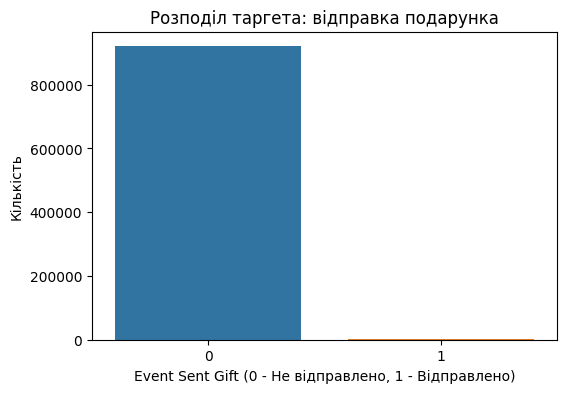

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Коментар: Створюємо графік для таргетної змінної event_sent_gift
plt.figure(figsize=(6, 4))  # Встановлюємо розмір графіка
sns.countplot(x='event_sent_gift', data=merged_data)  # Створюємо стовпчикову діаграму для змінної event_sent_gift
plt.title('Розподіл таргета: відправка подарунка')  # Додаємо заголовок
plt.xlabel('Event Sent Gift (0 - Не відправлено, 1 - Відправлено)')  # Встановлюємо підпис осі X
plt.ylabel('Кількість')  # Встановлюємо підпис осі Y
plt.show()  # Виводимо графік


In [11]:
merged_data.event_sent_gift.value_counts()

event_sent_gift
0    920321
1      2600
Name: count, dtype: int64

In [ ]:
# Висновки: 
# - цільова змінна не збаласнована
# - Співвідношення класів - 354 до 1

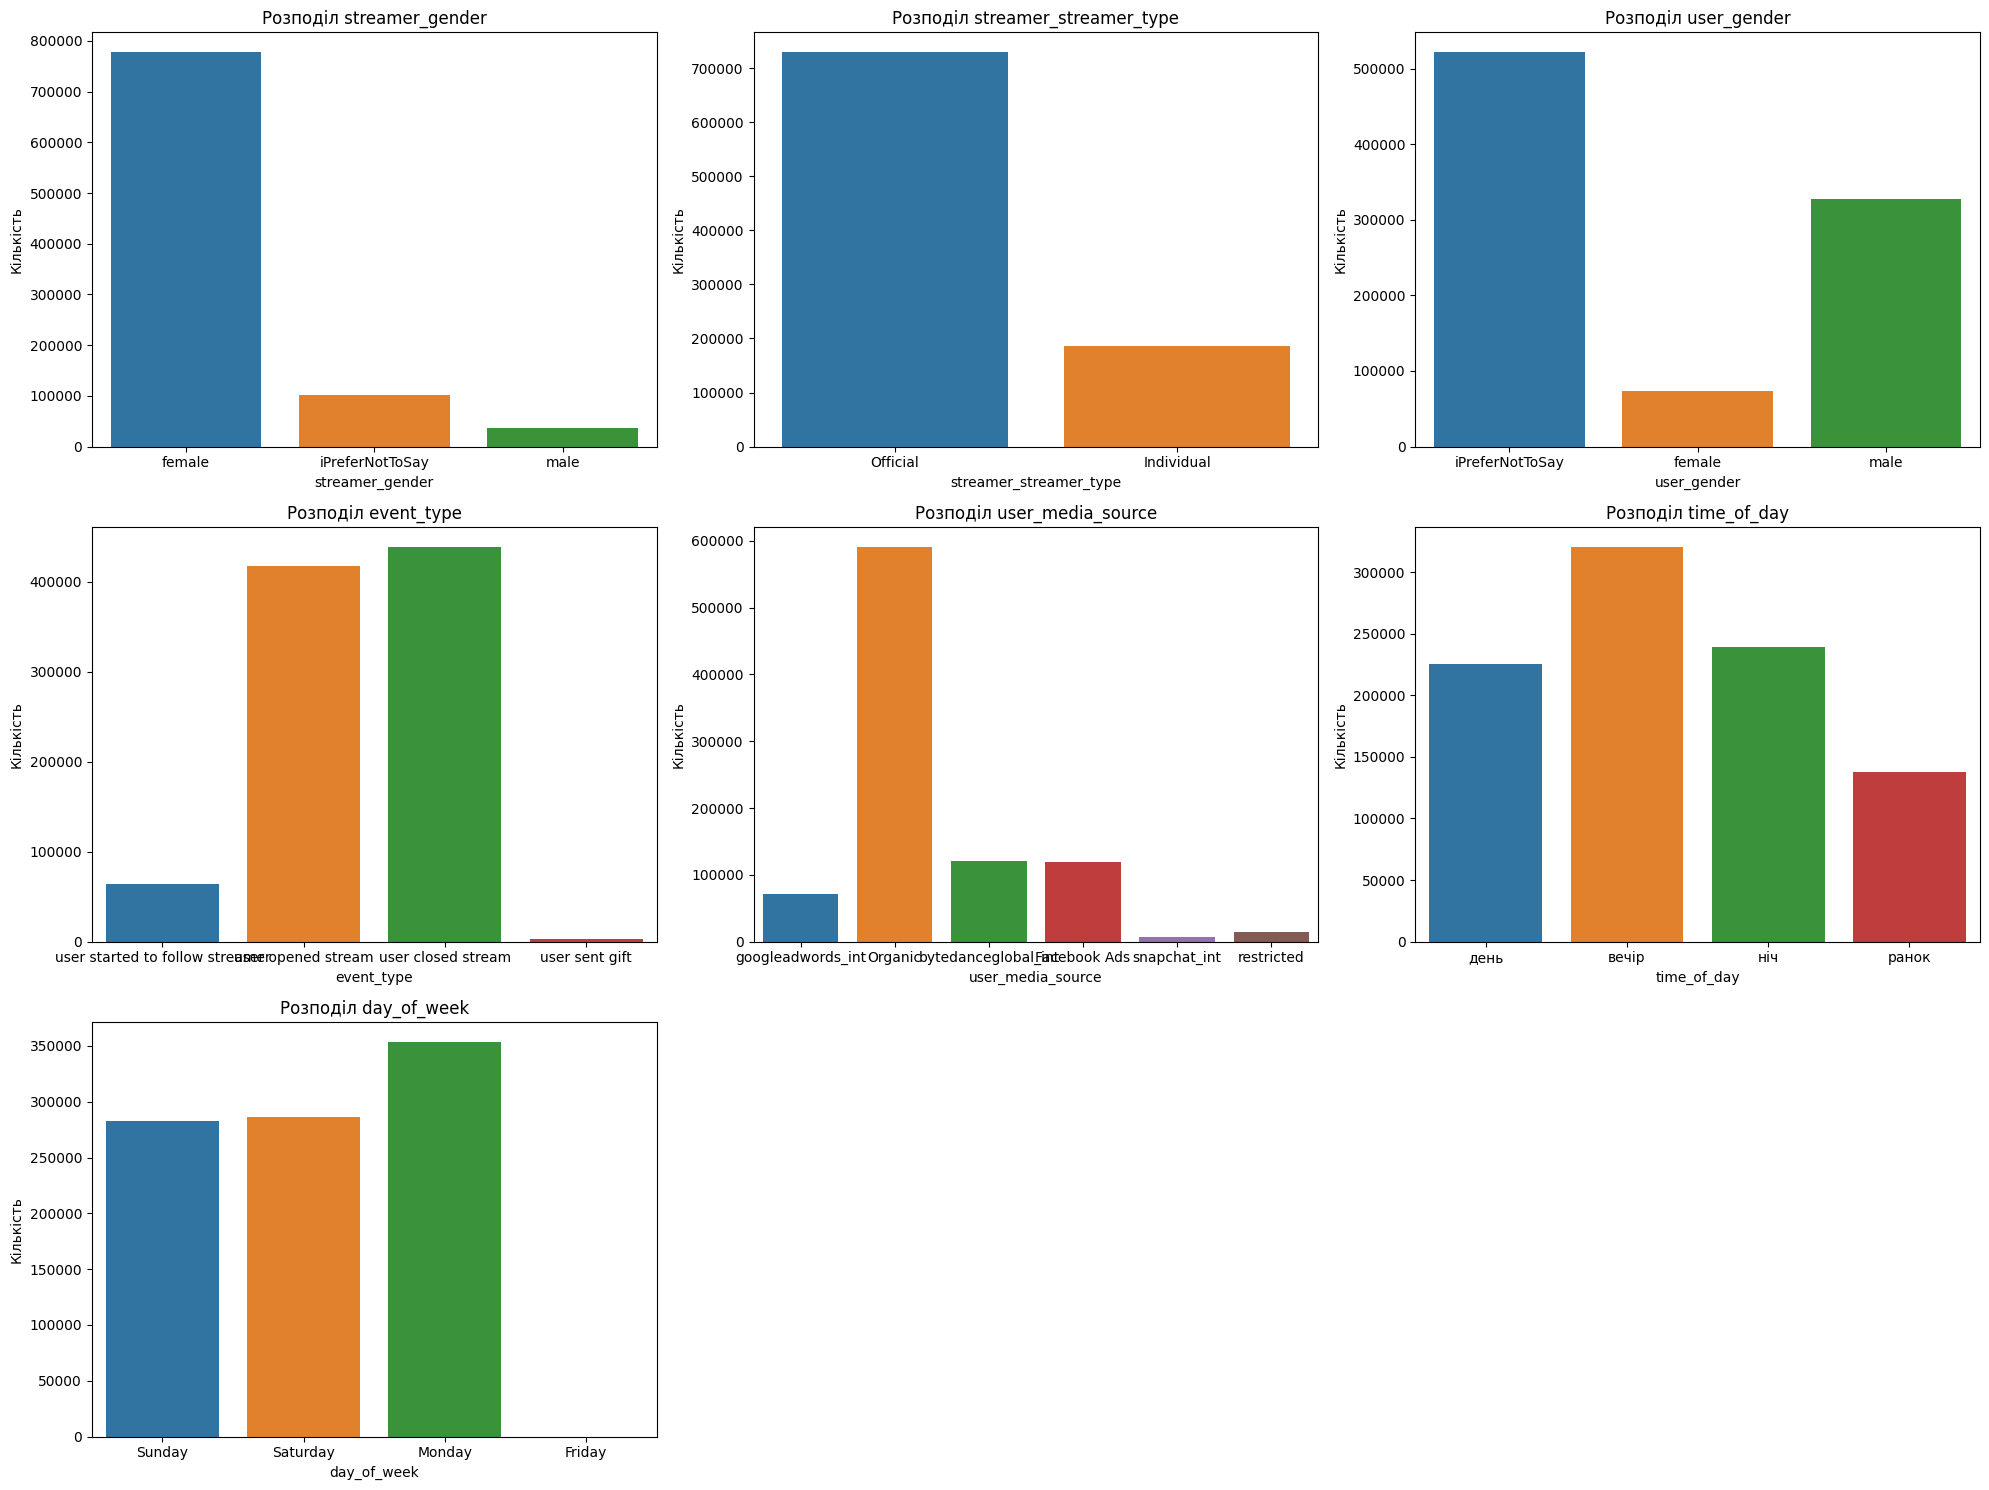

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Переводимо event_timestamp в формат datetime
merged_data['event_timestamp'] = pd.to_datetime(merged_data['event_timestamp'])

# День тижня
merged_data['day_of_week'] = merged_data['event_timestamp'].dt.day_name()

# Час дня 
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'ранок'
    elif 12 <= hour < 18:
        return 'день'
    elif 18 <= hour < 24:
        return 'вечір'
    else:
        return 'ніч'
    
merged_data['time_of_day'] = merged_data['event_timestamp'].dt.hour.apply(get_time_of_day)




# Вибираємо категоріальні ознаки для візуалізації
categorical_features = [
    'streamer_gender', 'streamer_streamer_type', 'user_gender', 'event_type',
    'user_media_source', 'time_of_day', 'day_of_week'
]

# Налаштовуємо розмір загальної фігури
plt.figure(figsize=(20, 15))

# Створюємо графіки розподілу для кожної категоріальної ознаки
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)  # 3 рядки, 2 колонки для графіків
    sns.countplot(x=feature, data=merged_data)
    plt.title(f'Розподіл {feature}')
    plt.xlabel(feature)
    plt.ylabel('Кількість')

# Виводимо всі графіки
plt.tight_layout()
plt.show()


# Короткий аналіз категоріальних ознак

1. **streamer_gender**: Більшість стрімерів — жіночої статі. Чоловіків значно менше, а "iPreferNotToSay" також має значну частку.
2. **streamer_streamer_type**: Переважна більшість стрімерів належать до категорії "Official", стрімери категорії "Individual" складають меншість.
3. **user_gender**: Найбільша частка користувачів — чоловіки, тоді як жінки та "iPreferNotToSay" складають менші частки.
4. **event_type**: Найпоширеніші події — "відкриття стріму" та "закриття стріму", а "відправлення подарунку" є дуже рідкісною подією.
5. **user_media_source**: Найпопулярніше джерело — "Organic", значно менше користувачів прийшли через "Facebook Ads", "Google Adwords" та інші джерела.
6. **time_of_day**: Найбільш активні періоди — вечір та ніч, менше активності вранці та вдень.
7. **day_of_week**: Найбільша активність спостерігається в понеділок, тоді як інші дні, такі як неділя і субота, мають трохи менше подій.


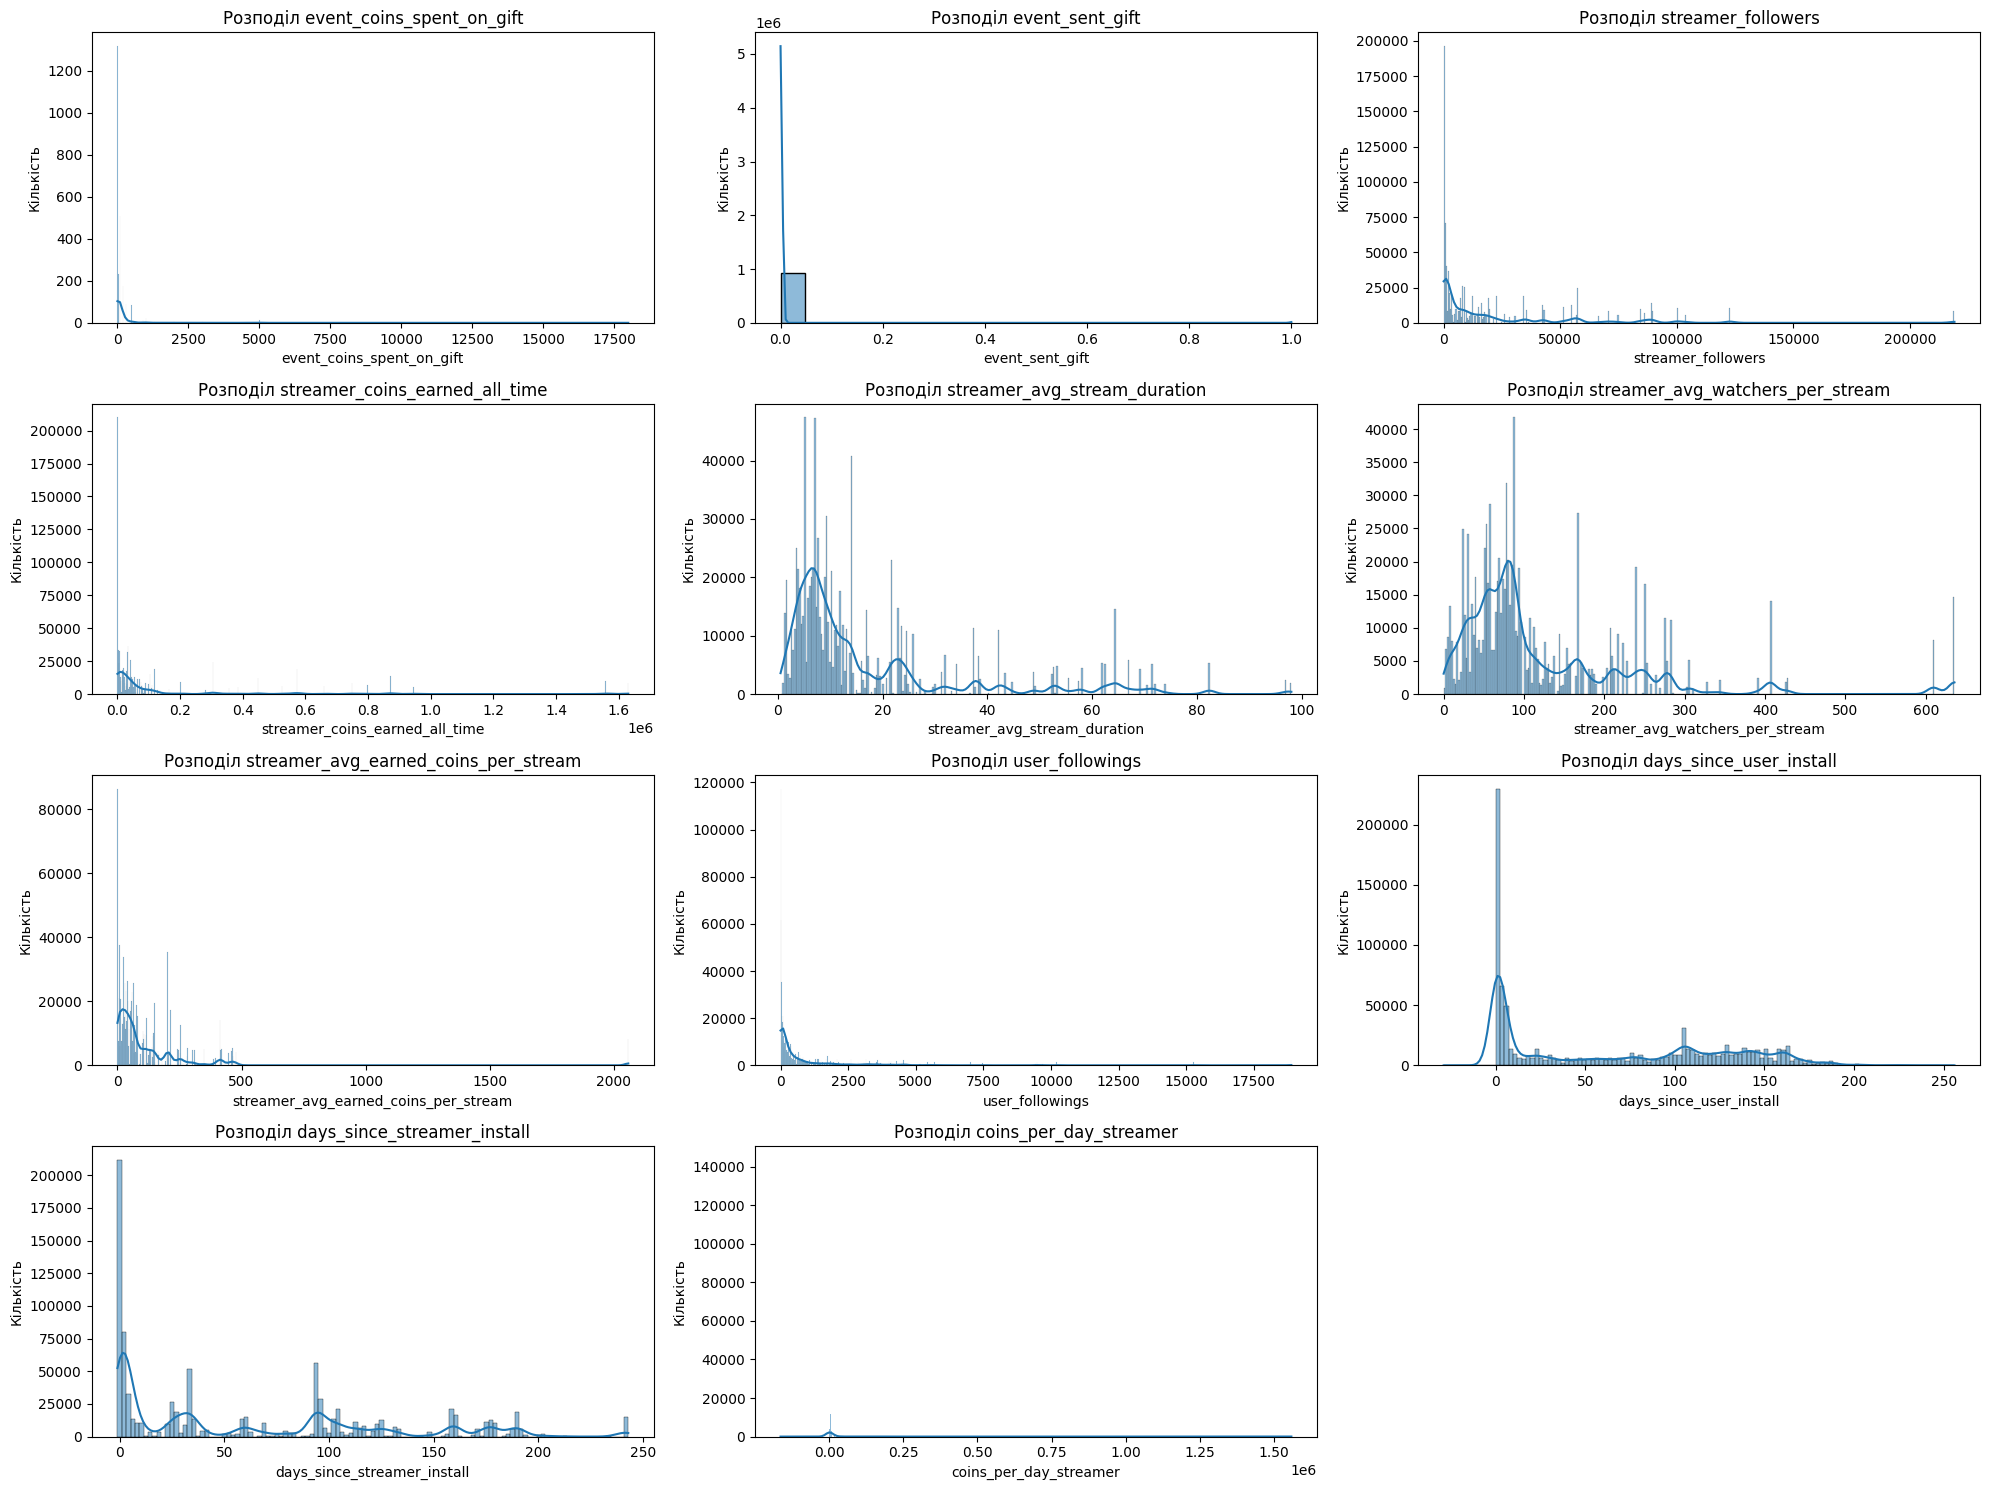

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вибираємо числові ознаки для візуалізації
numerical_features = [
    'event_coins_spent_on_gift', 'event_sent_gift', 'streamer_followers',
    'streamer_coins_earned_all_time', 'streamer_avg_stream_duration', 
    'streamer_avg_watchers_per_stream', 'streamer_avg_earned_coins_per_stream',
    'user_followings', 'days_since_user_install', 'days_since_streamer_install',
    'coins_per_day_streamer'
]

# Налаштовуємо розмір загальної фігури
plt.figure(figsize=(20, 15))

# Створюємо графіки розподілу для кожної числової ознаки
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)  # 4 рядки, 3 колонки для графіків
    sns.histplot(merged_data[feature].dropna(), kde=True)
    plt.title(f'Розподіл {feature}')
    plt.xlabel(feature)
    plt.ylabel('Кількість')

# Виводимо всі графіки
plt.tight_layout()
plt.show()


# Короткий аналіз числових ознак

1. **event_coins_spent_on_gift**: Дуже рідкісні події з відправленням великої кількості коінів. Більшість користувачів не відправляють взагалі або відправляють мінімальну кількість.
2. **streamer_followers**: Велика кількість стрімерів має мало підписників, кілька стрімерів мають дуже велику кількість підписників, що створює асиметрію.
3. **streamer_coins_earned_all_time**: Більшість стрімерів заробили невелику кількість коінів, але є кілька випадків із значно вищими значеннями.
4. **streamer_avg_stream_duration**: Тривалість стрімів для більшості стрімерів концентрується в низьких значеннях, але є декілька стрімерів з тривалішими стрімами.
5. **streamer_avg_watchers_per_stream**: Розподіл досить широкий, але більшість стрімів має менше ніж 100 глядачів, з рідкісними випадками стрімів із великою аудиторією.
6. **streamer_avg_earned_coins_per_stream**: Аналогічно до зароблених коінів, більшість стрімерів отримують небагато коінів за стрім.
7. **user_followings**: Більшість користувачів підписані на незначну кількість стрімерів, але є декілька користувачів із великою кількістю підписок.
8. **days_since_user_install**: Більшість користувачів нещодавно інсталювали додаток, хоча є невелика кількість з тривалим періодом використання.
9. **days_since_streamer_install**: Аналогічно користувачам, більшість стрімерів є відносно новими на платформі.
10. **coins_per_day_streamer**: Більшість стрімерів заробляють дуже мало коінів щодня, але є декілька випадків із дуже великими значеннями.


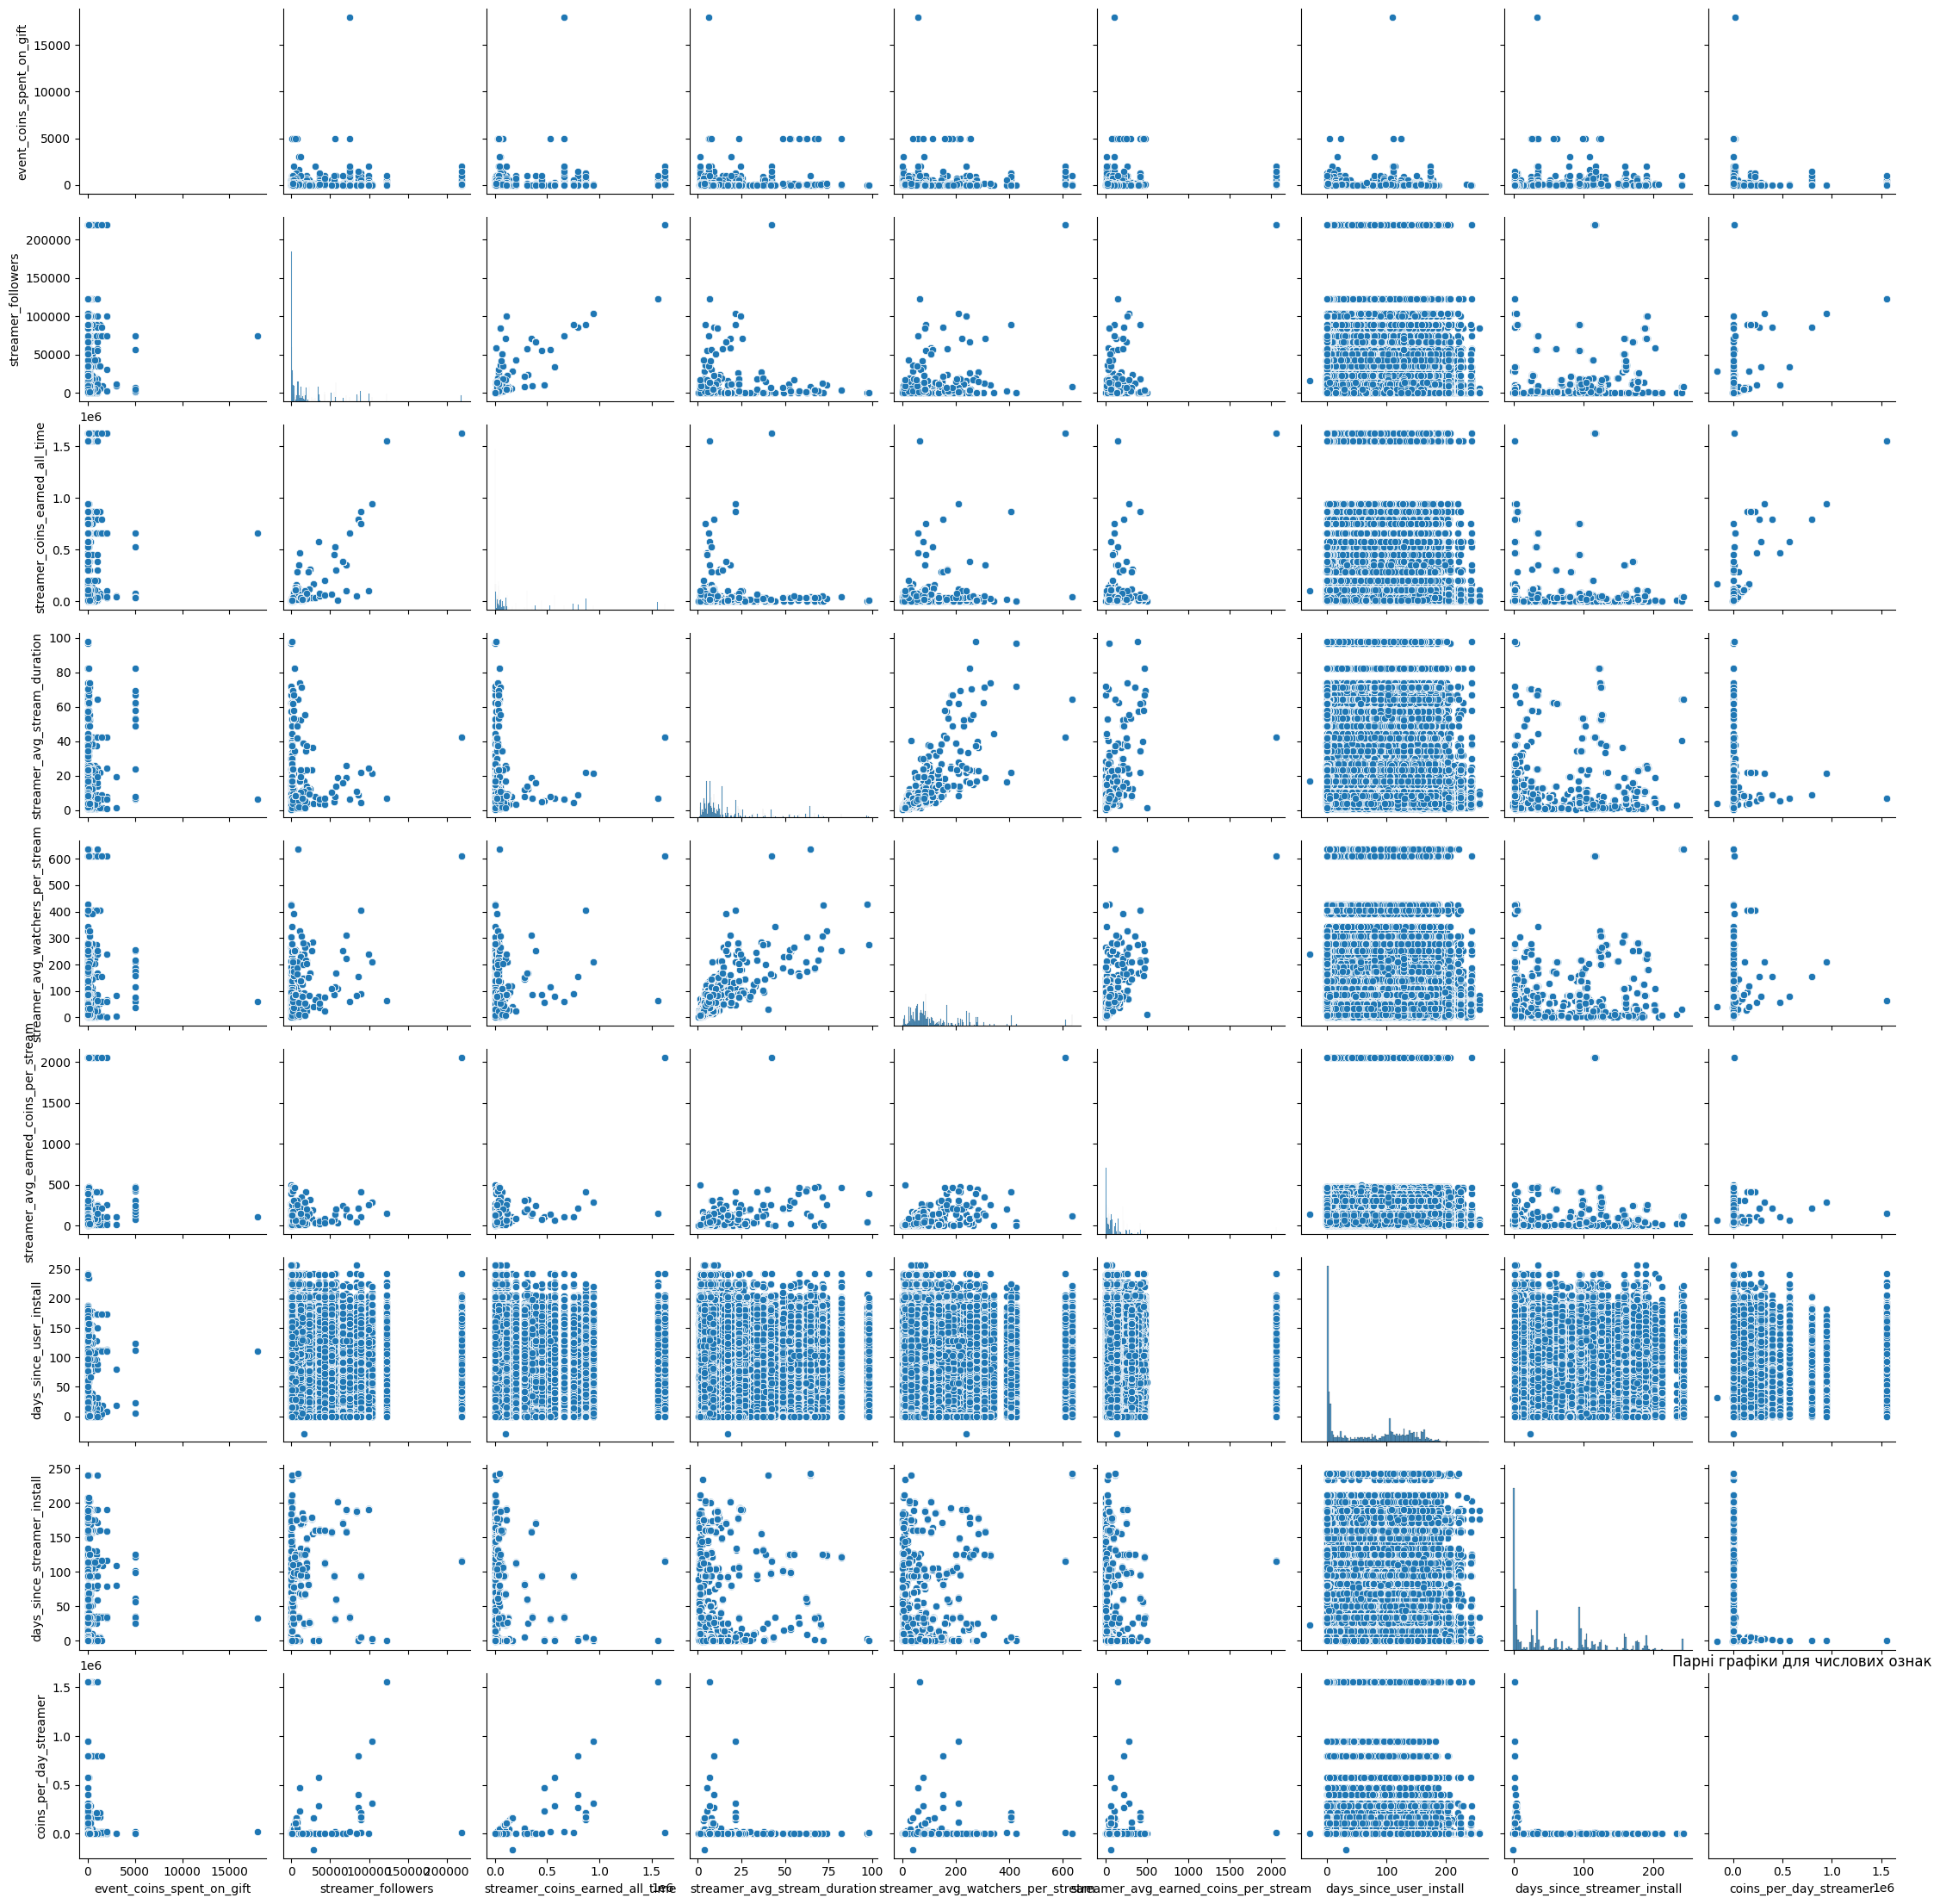

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вибираємо лише числові ознаки
numerical_features = ['event_coins_spent_on_gift', 'streamer_followers', 'streamer_coins_earned_all_time',
                      'streamer_avg_stream_duration', 'streamer_avg_watchers_per_stream', 
                      'streamer_avg_earned_coins_per_stream', 'days_since_user_install', 
                      'days_since_streamer_install', 'coins_per_day_streamer']

# Створюємо парні графіки для числових ознак
sns.pairplot(merged_data[numerical_features])
plt.title('Парні графіки для числових ознак')
plt.show()


# Аналіз парних графіків

1. **streamer_avg_watchers_per_stream vs. streamer_avg_stream_duration**:
   - Є певна залежність: чим довше триває стрім, тим більше глядачів можна зібрати. Але взаємозв'язок не лінійний і містить багато шуму.

2. **streamer_coins_earned_all_time vs. streamer_followers**:
   - Логічний взаємозв'язок: більше підписників веде до більшого заробітку коінів. Водночас існують стрімери з великою кількістю підписників, але невеликими доходами.

3. **coins_per_day_streamer vs. streamer_coins_earned_all_time**:
   - Очікуваний сильний зв'язок: чим більше коінів стрімер заробляє за день, тим більші загальні заробітки.

4. **days_since_user_install vs. user_followings**:
   - Користувачі, які давно зареєстровані, можуть мати більшу кількість підписок. Однак велика частина користувачів із нещодавньою реєстрацією не підписуються на стрімерів активно.

5. **coins_per_day_streamer vs. streamer_avg_earned_coins_per_stream**:
   - Є деяка кореляція, яка показує, що стрімери, що отримують більше коінів за стрім, також мають вищі середньоденні заробітки.


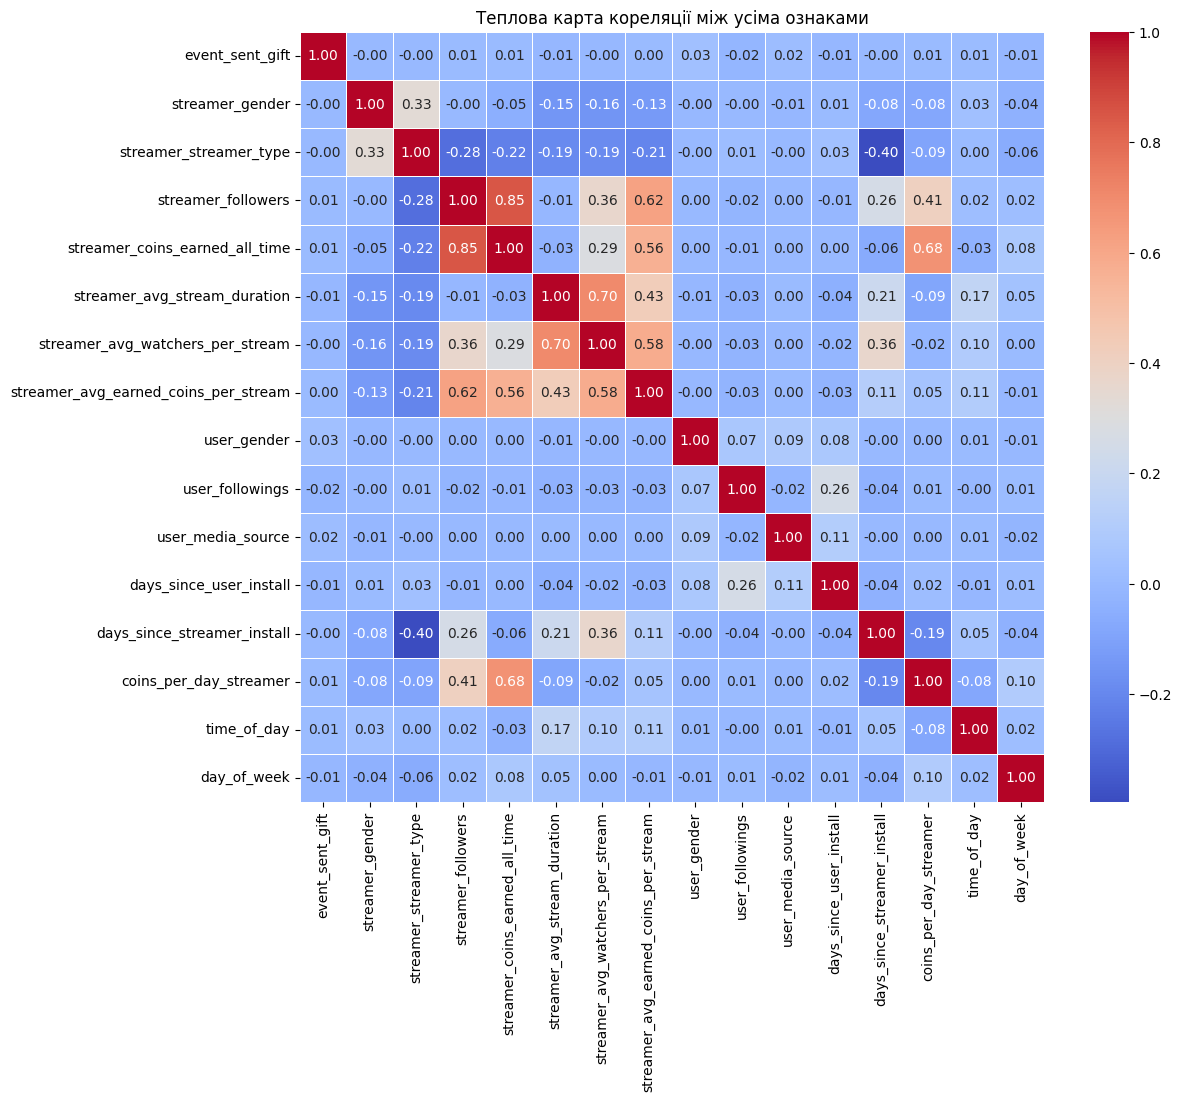

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Список ознак, які необхідно включити (окрім айдішників)
features = [
    'event_sent_gift', 'streamer_gender', 'streamer_streamer_type', 'streamer_followers',
    'streamer_coins_earned_all_time', 'streamer_avg_stream_duration', 
    'streamer_avg_watchers_per_stream', 'streamer_avg_earned_coins_per_stream', 
    'user_gender', 'user_followings', 'user_media_source', 'days_since_user_install', 
    'days_since_streamer_install', 'coins_per_day_streamer', 'time_of_day', 'day_of_week'
]

# Перетворюємо категоріальні ознаки на числові за допомогою factorize()
for feature in features:
    if merged_data[feature].dtype == 'object':
        merged_data[feature] = pd.factorize(merged_data[feature])[0]

# Обчислюємо кореляцію між усіма ознаками
corr_matrix = merged_data[features].corr()

# Створюємо теплову карту кореляції
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляції між усіма ознаками')
plt.show()


# Аналіз теплової карти кореляцій

1. **streamer_followers vs. streamer_coins_earned_all_time (0.85)**:
   - Сильна позитивна кореляція між кількістю підписників стрімера та загальною кількістю зароблених коінів. Це логічно, оскільки більше підписників зазвичай означає більший дохід.

2. **streamer_avg_watchers_per_stream vs. streamer_avg_earned_coins_per_stream (0.58)**:
   - Є помірна позитивна кореляція між середньою кількістю глядачів на стрімі та середньою кількістю зароблених коінів за стрім. Це показує, що більше глядачів може призвести до збільшення заробітку.

3. **coins_per_day_streamer vs. streamer_coins_earned_all_time (0.68)**:
   - Помітна кореляція між заробітком коінів за день та загальним заробітком стрімера. Це свідчить про постійну продуктивність тих стрімерів, які добре заробляють щоденно.

4. **streamer_avg_stream_duration vs. streamer_avg_watchers_per_stream (0.62)**:
   - Стримери, які проводять тривалі стріми, мають тенденцію до збирання більшої кількості глядачів на стрімі, що свідчить про те, що довші стріми можуть бути більш успішними в плані глядацької активності.

5. **user_followings vs. days_since_user_install (-0.09)**:
   - Хоча кореляція негативна і невелика, вона може свідчити про те, що нові користувачі частіше підписуються на стрімерів, ніж ті, хто давно зареєстрований.
